# 1. How many multiplications and additions do you need to peerform a matrix multiplication between a (n,k) and (k,m) matrix ? explain.

Multiplications:
* Every element in the resultant matrix is computated by multipying corrseponding elements in the row of the first matrix to column of the second matrix and finally summing these products. 
* For every element it requires k multiplications.
* Since there are total $ n\times m $ elements in the resultant matrix, the total number of multiplaications is $$ n \times m \times k$$

Additions:
* After the multiplication is done, the k products are summed.
* This requires k-1 additions for each element.
* For $ n \times m $ elements in the resultant matrix, the total number of additions are $$ n \times m \times (k-1)$$

# 2. Write python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timings of both solutions. Which on eis faster? why?

In [44]:
import time
def matrix_multiplication(A,B):
    n=len(A)
    k=len(A[0])
    m=len(B[0])
    r_m = []
    for _ in range(n):
        row= [0]*m
        r_m.append(row)
    for i in range(n):
        for j in range(m):
            for l in range(k):
                r_m[i][j]+=A[i][l]*B[l][j]
    return r_m
A=[[0,1,2],[1,2,3],[2,3,4]]
B=[[1,2],[2,3],[2,0]]
initial_time= time.time()
resultant_matrix=matrix_multiplication(A,B)
end_time= time.time()
print("result of list of lists:",resultant_matrix)
print("Time consumed:",end_time-initial_time)


result of list of lists: [[6, 3], [11, 8], [16, 13]]
Time consumed: 9.083747863769531e-05


In [46]:
import numpy as np
A=[[0,1,2],[1,2,3],[2,3,4]]
B=[[1,2],[2,3],[2,0]]
start_time=time.time()
reultant_matrix= np.dot(A,B)
end_time=time.time()
print("result of numpy:", resultant_matrix)
print("Time consumed:",end_time-initial_time)


reult of numpy: [[6, 3], [11, 8], [16, 13]]
Time consumed: 294.44281482696533


NumPy is faster because many calculations at once, unlike python which does them one by one and NumPy uses special super fast libraries for calculation.  

# 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [30]:
#BY REPEATED PASSES
import numpy as np
import time
def median(arr):
    def nth_largest(arr, n):
        for i in range(n):
            max_val = max(arr)
            arr.remove(max_val)
        return max(arr)
    
    n = len(arr)
    if n % 2 == 1:
        return nth_largest(arr.copy(), n // 2)
    else:
        return 0.5 * (nth_largest(arr.copy(), n // 2) + nth_largest(arr.copy(), n // 2 - 1))

#BY QUICKSORT
import random
import numpy as np
import time
def quickselect(arr, k):
    if len(arr) == 1:
        return arr[0]
    pivot = random.choice(arr)
    lows = [x for x in arr if x < pivot]
    highs = [x for x in arr if x > pivot]
    pivots = [x for x in arr if x == pivot]
    if k < len(lows):
        return quickselect(lows, k)
    elif k < len(lows) + len(pivots):
        return pivots[0]
    else:
        return quickselect(highs, k - len(lows) - len(pivots))
def median_quickselect(arr):
    n = len(arr)
    if n % 2 == 1:
        return quickselect(arr, n // 2)
    else:
        return 0.5 * (quickselect(arr, n // 2 - 1) + quickselect(arr, n // 2))
arr=np.random.uniform(0,1000,size=1001).tolist()

start_time=time.time()
median=median(arr)
end_time=time.time()
print(f"median:{median},Time:{end_time-start_time}")

start_time=time.time()
median=median_quickselect(arr)
end_time=time.time()
print(f"median_quicksort:{median},Time:{end_time-start_time}")

start_time=time.time()
median=np.median(arr)
end_time=time.time()
print(f"median_numpy:{median},Time:{end_time-start_time}")




median:513.1404538650213,Time:0.009351015090942383
median_quicksort:513.1404538650213,Time:0.0003581047058105469
median_numpy:513.1404538650213,Time:0.00033593177795410156


# 4. What is the gradient of the following function with respect to x and y?
$$ x^2y+y^3sin(x)$$

f(x) = $ x^2y+y^3sin(x) $


* gradient with respect to x


$\frac{df(x)}{dx} $= y$\frac{d(x^2)}{dx}$+ $y^3$ $\frac{dsin(x)}{dx}$ = y(2x)+$y^3$cos(x) = 2xy+$y^3$cos(x)


f(y) = $x^2$y+$y^3$sin(x)

* gradient with respect to y

$\frac{df(y)}{dy}$ = $x^2$$\frac{d(y)}{dy}$ + sin(x)$\frac{d(y^3)}{dy}$ = $x^2$+sin(x)(3$y^2$) = $x^2$+3$y^2$sin(x)

# 5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y



In [ ]:
pip install jax jaxlib

In [2]:
import jax
import jax.numpy as jnp
def f(x,y):
    return x**2*y+y**3*jnp.sin(x)
a = jax.grad(f,argnums=0)
b = jax.grad(f,argnums=1)
x =1.0
y =2.0
grd_wrt_x= a(x,y)
grd_wrt_y= b(x,y)
print(grd_wrt_x,grd_wrt_y)



8.322418 11.097652


if we place x=1 and y=2 in the previous one we get


gradient wrt x= 2(1)(2)+(8)(cos(1))= 8.3222418


gradient wrt y= 1+ 3(4)(sin(1))= 11.097652

# 6. Use sympy to confirm that you obtain the same gradient analytically.

In [21]:
import sympy as sp
x, y = sp.symbols('x y')
f = x**2*y+y**3*sp.sin(x)
grad_x = sp.diff(f, x)
grad_y = sp.diff(f, y)
grad_x_value = grad_x.subs({x: 1, y: 2})
grad_y_value = grad_y.subs({x: 1, y: 2})
print("Gradient with respect to x at (x=1, y=2):", grad_x_value)
print("Gradient with respect to y at (x=1, y=2):", grad_y_value)

Gradient with respect to x at (x=1, y=2): 4 + 8*cos(1)
Gradient with respect to y at (x=1, y=2): 1 + 12*sin(1)


# 9. Using matplotlib plot the following functions on the domain x=0.5 to 100.0 in steps of 0.5

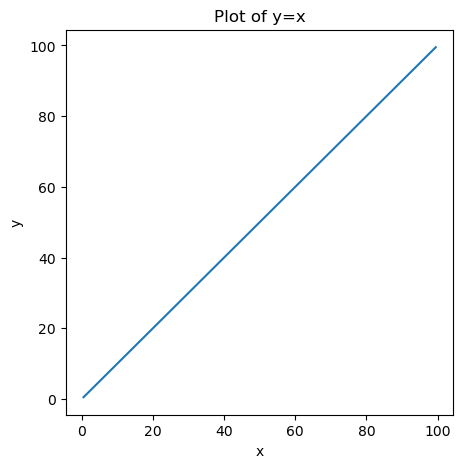

In [32]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0.5,100.0,0.5)
y=x
plt.figure(figsize=(5,5))
plt.plot(x,y,label="y=x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y=x")
plt.show()

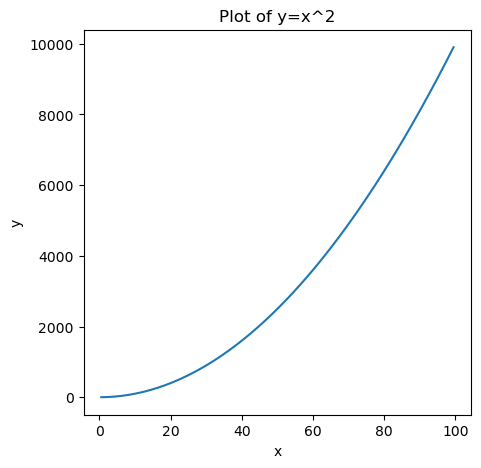

In [11]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0.5,100.0,0.5)
y=x**2
plt.figure(figsize=(5,5))
plt.plot(x,y,label="y=x**2")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y=x^2")
plt.show()

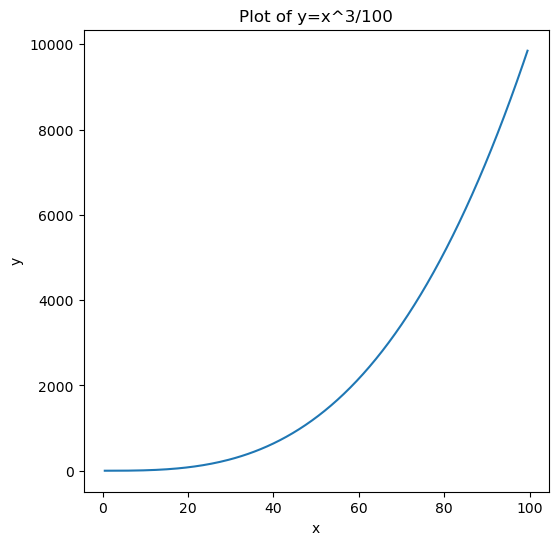

In [22]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0.5,100.0,0.5)
y=x**3/100
plt.figure(figsize=(6,6))
plt.plot(x,y,label="y=x**3/100")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y=x^3/100")
plt.show()

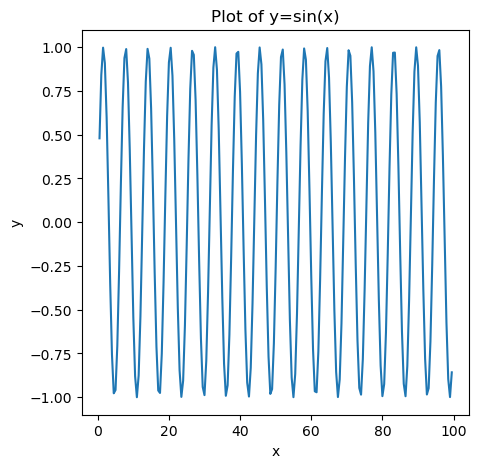

In [17]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0.5,100.0,0.5)
y=np.sin(x)
plt.figure(figsize=(5,5))
plt.plot(x,y,label="y=sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y=sin(x)")
plt.show()

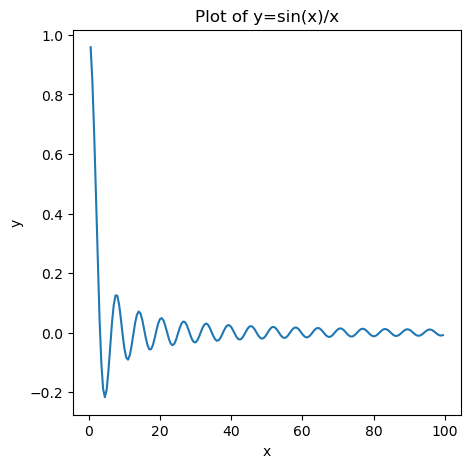

In [19]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0.5,100.0,0.5)
y=np.sin(x)/x
plt.figure(figsize=(5,5))
plt.plot(x,y,label="y=sin(x)/x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y=sin(x)/x")
plt.show()

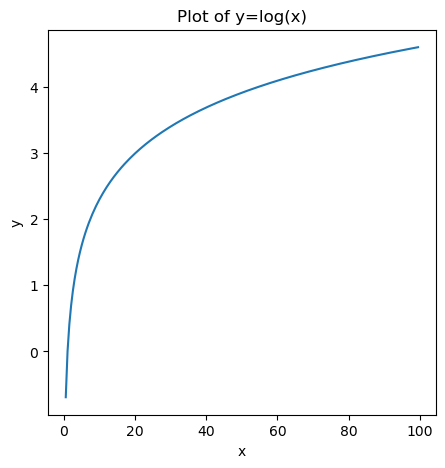

In [20]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0.5,100.0,0.5)
y=np.log(x)
plt.figure(figsize=(5,5))
plt.plot(x,y,label="y=log(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y=log(x)")
plt.show()

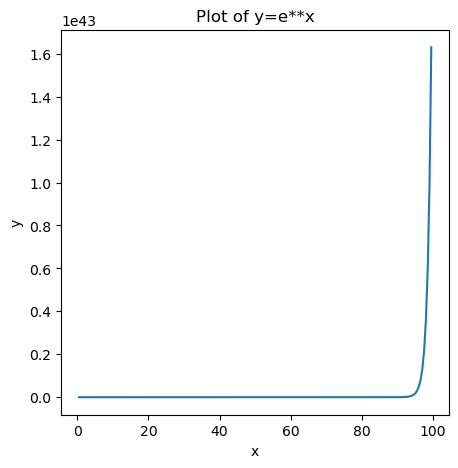

In [21]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0.5,100.0,0.5)
y=np.e**x
plt.figure(figsize=(5,5))
plt.plot(x,y,label="y=e**x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y=e**x")
plt.show()

# 10. Using numpy generate a matrix of size 20$\times$ 5 contianing random numbers drawn uniformly from the range of 1 to 2. Using pandas create a dataframe out of this matrix. Name the columns of the dataframes as "a","b","c","d","e". Find the column with the highest standard deviation. Find the row with the lowest mean.

In [8]:
import numpy as np
import pandas as pd
m = np.random.uniform(1,2,size=(20,5))
print(m)
c= ["a","b","c","d","e"]
data_frame= pd.DataFrame(m,columns=c)
standard_deviation=data_frame.std()
max_std_clm= standard_deviation.idxmax()
print(f"Column with highest standard deviation is:{max_std_clm}")
row= data_frame.mean(axis=1)
min_mean= row.idxmin()
print(f"Row with lowest mean: {min_mean}")

[[1.25095232 1.84928728 1.38947079 1.62795367 1.40178024]
 [1.78788791 1.0044017  1.87864876 1.28348592 1.89693611]
 [1.29087006 1.79021005 1.77578494 1.85275814 1.92523607]
 [1.31602682 1.71313    1.33592047 1.84611252 1.68434522]
 [1.67246248 1.2168902  1.57372442 1.03401161 1.32675747]
 [1.00665932 1.05419697 1.97995789 1.3841344  1.82352793]
 [1.00405289 1.38323312 1.56250828 1.70010257 1.27740307]
 [1.26395122 1.95007778 1.82164535 1.90871948 1.52185362]
 [1.11686027 1.75514663 1.32976012 1.9891391  1.22727892]
 [1.47939101 1.5214779  1.02226193 1.99900182 1.05954281]
 [1.8263905  1.54393412 1.50138887 1.91425221 1.24095289]
 [1.40835002 1.78852682 1.32590814 1.558098   1.17373632]
 [1.31164756 1.39147694 1.88588276 1.76812114 1.71047348]
 [1.86832716 1.85639118 1.60878722 1.4119693  1.08315553]
 [1.06120867 1.21866733 1.95070268 1.81443868 1.58403074]
 [1.57667699 1.5983289  1.08107593 1.42410991 1.16308849]
 [1.70851894 1.30995527 1.22568908 1.90060376 1.07300688]
 [1.19690437 1

# 12. Write a small piece of code to explain broadcasting in numpy

If you have two arrays of different shapes then broadcasting automatically, expands the smaller array to match the shape of the larger array, in order to to perform operation like addition or multiplication on them.

In [7]:
import numpy as np
A= np.array([0,1,2])  # shape(3,)
B= np.array([[0],[1],[2]])  # shape(3,1)
C=A+B  #broadcasting happens here
# A is streched to (3,3) and B is streched to (3,3)
print(C)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


# 13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [7]:
import numpy as np
def argmin(arr):
    
    min_val = arr[0]
    min_index = 0
    for i in range(1, len(arr)):
        if arr[i] < min_val:
          min_val = arr[i]
          min_index = i
    return min_index
arr = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])
result = argmin(arr)
print("My argmin:", result)
print("Numpy argmin:", np.argmin(arr))

My argmin: 1
Numpy argmin: 1
